1. 제약조건 정리    
    1) 가중치 합은 1
    2) 한국 주식 투자비율 20% 이상
2. 환헷지 환노출 포트폴리오 따로 투자
 

# 데이터 가져오기 및 기초 함수 정의

## 기본 함수 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize
import plotly.figure_factory as ff
import plotly.express as px
from ipywidgets import VBox, HBox, Output, Button, IntText, Label, FloatText
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
import matplotlib.animation as animation
import scipy.optimize as sco
from scipy.stats import linregress
from matplotlib import font_manager, rc
from scipy.stats import t, laplace
import statsmodels.api as sm

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

target_return = pd.read_excel('C:/Users/qwe54/OneDrive/바탕 화면/자산배분/목표수익률.xlsx', index_col=0)
data = pd.read_csv("all_final_returns.csv", index_col=0)
rf = pd.read_csv("한국 1년 채권수익률 과거 데이터.csv", index_col=0)
rf = rf/100
data

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return,S&P 500_cum,KSPI 200_cum,US_BOND_cum,KOR_BOND_cum,snp_exposure_return(cum),snp_hedged_return(cum),us_bond_exposure_return(cum),us_bond_hedged_return(cum)
Symbol Name,,,,,,,,,,,,
2014-03-31,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000031,1.000000,1.000031
2014-04-01,0.003254,0.007045,-0.000960,-0.000033,1.007045,1.003254,0.999040,0.999967,1.004501,1.007075,0.996517,0.999070
2014-04-02,0.002896,0.002853,-0.001567,-0.000198,1.009918,1.006160,0.997474,0.999769,1.002075,1.009948,0.989728,0.997504
2014-04-03,-0.001386,-0.001126,0.000354,0.000066,1.008781,1.004765,0.997828,0.999835,0.997643,1.008810,0.986812,0.997858
2014-04-04,0.000501,-0.012537,0.002303,0.000198,0.996133,1.005269,1.000126,1.000033,0.986161,0.996165,0.990114,1.000159
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22,0.012224,0.008731,0.000140,-0.000792,2.676131,1.382705,1.085135,1.229600,3.467853,2.676033,1.406167,1.085095
2024-04-23,-0.002550,0.011965,0.000884,0.000694,2.708150,1.379179,1.086095,1.230453,3.498196,2.708049,1.402940,1.086054
2024-04-24,0.021406,0.000213,-0.001744,-0.000429,2.708727,1.408702,1.084200,1.229925,3.492098,2.708624,1.397754,1.084159


In [2]:
data = data.pct_change()
data = data.iloc[1:]
data

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return,S&P 500_cum,KSPI 200_cum,US_BOND_cum,KOR_BOND_cum,snp_exposure_return(cum),snp_hedged_return(cum),us_bond_exposure_return(cum),us_bond_hedged_return(cum)
Symbol Name,,,,,,,,,,,,
2014-04-01,NaN,NaN,NaN,NaN,0.007045,0.003254,-0.000960,-0.000033,0.004501,0.007044,-0.003483,-0.000960
2014-04-02,-0.110039,-0.594969,0.633146,5.098238,0.002853,0.002896,-0.001567,-0.000198,-0.002414,0.002852,-0.006812,-0.001568
2014-04-03,-1.478614,-1.394784,-1.226161,-1.331255,-0.001126,-0.001386,0.000354,0.000066,-0.004423,-0.001126,-0.002947,0.000355
2014-04-04,-1.361612,10.129908,5.497697,2.019219,-0.012537,0.000501,0.002303,0.000198,-0.011510,-0.012535,0.003346,0.002306
2014-04-07,2.229151,-0.142544,-0.517595,1.996190,-0.010750,0.001619,0.001111,0.000595,-0.012620,-0.010751,-0.000781,0.001111
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22,-1.677348,-1.996883,-0.882493,-0.332541,0.008731,0.012224,0.000140,-0.000792,0.015403,0.008734,0.006754,0.000143
2024-04-23,-1.208587,0.370327,5.332449,-1.875694,0.011965,-0.002550,0.000884,0.000694,0.008750,0.011964,-0.002295,0.000884
2024-04-24,-9.395032,-0.982198,-2.971940,-1.618120,0.000213,0.021406,-0.001744,-0.000429,-0.001743,0.000212,-0.003696,-0.001745


In [3]:
df = data[['KSPI 200_cum', 'snp_hedged_return(cum)', 'us_bond_hedged_return(cum)', 'KOR_BOND_cum']]
df.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
df

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
Symbol Name,,,,
2014-04-01,0.003254,0.007044,-0.000960,-0.000033
2014-04-02,0.002896,0.002852,-0.001568,-0.000198
2014-04-03,-0.001386,-0.001126,0.000355,0.000066
2014-04-04,0.000501,-0.012535,0.002306,0.000198
2014-04-07,0.001619,-0.010751,0.001111,0.000595
...,...,...,...,...
2024-04-22,0.012224,0.008734,0.000143,-0.000792
2024-04-23,-0.002550,0.011964,0.000884,0.000694
2024-04-24,0.021406,0.000212,-0.001745,-0.000429


In [4]:
data_0 = df.loc["2015-02-02":"2016-02-01"]
data_1 = df.loc["2016-02-01":"2017-02-01"]
data_2 = df.loc["2017-02-01":"2018-02-01"]
data_3 = df.loc["2018-02-01":"2019-02-01"]
data_4 = df.loc["2019-02-01":"2020-02-01"]
data_5 = df.loc["2020-02-01":"2021-02-01"]
data_6 = df.loc["2021-02-01":"2022-02-01"]
data_7 = df.loc["2022-02-01":"2023-02-01"]
data_8 = df.loc["2023-02-01":"2024-02-01"]

In [5]:
target_return = target_return.iloc[2:]
target_return

,목표수익률
2015,0.035149
2016,0.039213
2017,0.051017
2018,0.043835
2019,0.026296
2020,-0.001756
2021,0.068055
2022,0.077038
2023,0.049539


In [6]:
rf

,한국 1년 채권 수익률
날짜,
2015,0.02011
2016,0.01460
2017,0.01435
2018,0.01761
2019,0.01765
2020,0.01106
2021,0.00619
2022,0.01496
2023,0.03690


In [7]:
# 포트폴리오 리턴과 변동성 계산 함수
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(252)
    return std, returns

In [8]:
# 초기 가중치 설정
initial_weights = np.array([1./len(df.columns) for asset in range(len(df.columns))])
# 가중치 범위 (0과 1 사이)
bounds = tuple((0, 1) for asset in range(len(df.columns)))
# 최적화 제약 조건 (모든 가중치 합은 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 가중치 합이 1
             

## 2015

In [9]:
rf.iloc[0]

한국 1년 채권 수익률    0.02011
Name: 2015, dtype: float64

In [10]:
risk_free_rate=0.02011

In [11]:
# 목적 함수 (최소화할 함수: 샤프 비율의 음수값) - 목적함수 minimize
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.02011):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [12]:
data_0.mean()

KOSPI 200_return   -0.000241
S&P 500_return     -0.000065
US_BOND_return      0.000017
KOR_BOND_return     0.000133
dtype: float64

In [13]:
kospi = data_0['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_0['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_0['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_0['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

In [14]:
def gene_dist_kospi(x):
        t_pdf = t.pdf(x, df=3, loc=np.mean(kospi['KOSPI 200_return']), scale=np.std(kospi['KOSPI 200_return']))  # t-분포의 자유도(kospi)는 임의로 설정됨
        laplace_pdf = laplace.pdf(x, loc=np.mean(kospi['KOSPI 200_return']), scale=np.std(kospi['KOSPI 200_return']))
        probx = (0.5*t_pdf) + (0.5* laplace_pdf) 
        return probx

In [15]:
def gene_dist_snp(x):
        t_pdf = t.pdf(x, df=2.5, loc=np.mean(snp['S&P 500_return']), scale=np.std(snp['S&P 500_return']))  # t-분포의 자유도(snp)는 임의로 설정됨
        laplace_pdf = laplace.pdf(x, loc=np.mean(snp['S&P 500_return']), scale=np.std(snp['S&P 500_return']))
        probx = (0.7*t_pdf) + (0.3* laplace_pdf) 
        return probx

In [16]:
def gene_dist_us(x):
        t_pdf = t.pdf(x, df=3, loc=np.mean(us_bond['US_BOND_return']), scale=np.std(us_bond['US_BOND_return']))  # t-분포의 자유도(us_bond)는 임의로 설정됨
        laplace_pdf = laplace.pdf(x, loc=np.mean(us_bond['US_BOND_return']), scale=np.std(us_bond['US_BOND_return']))
        probx = (0.2*t_pdf) + (0.8* laplace_pdf) 
        return probx

In [17]:
def gene_dist_kr(x):
        t_pdf = t.pdf(x, df=2, loc=np.mean(kr_bond['KOR_BOND_return']), scale=np.std(kr_bond['KOR_BOND_return']))  # t-분포의 자유도(kr_bond)는 임의로 설정됨
        laplace_pdf = laplace.pdf(x, loc=np.mean(kr_bond['KOR_BOND_return']), scale=np.std(kr_bond['KOR_BOND_return']))
        probx = (0.5*t_pdf) + (0.5* laplace_pdf) 
        return probx

In [18]:
def target_dist_kospi(x):
    # 데이터의 최솟값과 최댓값 계산
    min_return = min(kospi['KOSPI 200_return'])
    max_return = max(kospi['KOSPI 200_return'])
    
    # 최솟값과 최댓값 사이를 10000개의 구간으로 나누기
    bins = np.linspace(min_return, max_return, 1000)
    
    # x가 속한 구간의 인덱스를 찾기
    bin_index = np.searchsorted(bins, x)
    
    # x가 속한 구간의 인덱스를 범위 내로 조정
    if bin_index == 0:
        bin_index = 1
    elif bin_index == len(bins):
        bin_index = len(bins) - 1
    
    # x가 속한 구간의 인덱스로 hist_ratio 값을 찾아서 반환
    hist, _ = np.histogram(kospi['KOSPI 200_return'], bins=bins)
    hist_ratio = hist / len(kospi['KOSPI 200_return'])
    return hist_ratio[bin_index - 1]

In [19]:
def target_dist_snp(x):
    # 데이터의 최솟값과 최댓값 계산
    min_return = min(snp['S&P 500_return'])
    max_return = max(snp['S&P 500_return'])
    
    # 최솟값과 최댓값 사이를 10000개의 구간으로 나누기
    bins = np.linspace(min_return, max_return, 1000)
    
    # x가 속한 구간의 인덱스를 찾기
    bin_index = np.searchsorted(bins, x)
    
    # x가 속한 구간의 인덱스를 범위 내로 조정
    if bin_index == 0:
        bin_index = 1
    elif bin_index == len(bins):
        bin_index = len(bins) - 1
    
    # x가 속한 구간의 인덱스로 hist_ratio 값을 찾아서 반환
    hist, _ = np.histogram(snp['S&P 500_return'], bins=bins)
    hist_ratio = hist / len(snp['S&P 500_return'])
    return hist_ratio[bin_index - 1]

In [20]:
def target_dist_us(x):
    # 데이터의 최솟값과 최댓값 계산
    min_return = min(us_bond['US_BOND_return'])
    max_return = max(us_bond['US_BOND_return'])
    
    # 최솟값과 최댓값 사이를 10000개의 구간으로 나누기
    bins = np.linspace(min_return, max_return, 1000)
    
    # x가 속한 구간의 인덱스를 찾기
    bin_index = np.searchsorted(bins, x)
    
    # x가 속한 구간의 인덱스를 범위 내로 조정
    if bin_index == 0:
        bin_index = 1
    elif bin_index == len(bins):
        bin_index = len(bins) - 1
    
    # x가 속한 구간의 인덱스로 hist_ratio 값을 찾아서 반환
    hist, _ = np.histogram(us_bond['US_BOND_return'], bins=bins)
    hist_ratio = hist / len(us_bond['US_BOND_return'])
    return hist_ratio[bin_index - 1]

In [21]:
def target_dist_kr(x):
    # 데이터의 최솟값과 최댓값 계산
    min_return = min(kr_bond['KOR_BOND_return'])
    max_return = max(kr_bond['KOR_BOND_return'])
    
    # 최솟값과 최댓값 사이를 10000개의 구간으로 나누기
    bins = np.linspace(min_return, max_return, 1000)
    
    # x가 속한 구간의 인덱스를 찾기
    bin_index = np.searchsorted(bins, x)
    
    # x가 속한 구간의 인덱스를 범위 내로 조정
    if bin_index == 0:
        bin_index = 1
    elif bin_index == len(bins):
        bin_index = len(bins) - 1
    
    # x가 속한 구간의 인덱스로 hist_ratio 값을 찾아서 반환
    hist, _ = np.histogram(kr_bond['KOR_BOND_return'], bins=bins)
    hist_ratio = hist / len(kr_bond['KOR_BOND_return'])
    return hist_ratio[bin_index - 1]

In [22]:
def run_mcmc_kospi(n_iter):

    sample_list = []
    num = 0
    acc_num = 0

    def MHstep(x0):

        # 후보생성함수에서 프로포절 생성
        # t-분포의 자유도(all_returns)는 임의로 설정됨
        min_return = min(kospi['KOSPI 200_return'])
        max_return = max(kospi['KOSPI 200_return'])

        while True:
            sample_t = t.rvs(df=3, loc=np.mean(kospi['KOSPI 200_return']), scale=np.std(kospi['KOSPI 200_return']))
            sample_la = laplace.rvs(loc=np.mean(kospi['KOSPI 200_return']), scale=np.std(kospi['KOSPI 200_return']))
            proposal = (0.5 * sample_t) + (0.5 * sample_la)

            # proposal이 최솟값과 최댓값 사이에 있으면 루프를 빠져나옴
            if min_return <= proposal <= max_return:
                break


        # M-H ratio
        rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
        MH_ratio = min(rat, 1) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= MH_ratio: # if accepted
            x1 = proposal # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a

    x0 = np.mean(kospi['KOSPI 200_return'])

    for i in range(n_iter):
        sample, accept = MHstep(x0)
        sample_list.append(sample)
        x0 = sample
        
        if accept == 1:
            acc_num += 1
            num += 1
        else:
            num += 1   

    print("수락된 프로포절의 수:", acc_num, "제안된 프로포절 수:", num)
    return sample_list


In [23]:
x0 = np.mean(snp['S&P 500_return'])
x_vals = np.linspace(min(snp['S&P 500_return']), max(snp['S&P 500_return']), 10000)

def run_mcmc_snp(n_iter):

    sample_list = []
    num = 0
    acc_num = 0

    def MHstep(x0):

        # 후보생성함수에서 프로포절 생성
        # t-분포의 자유도(all_returns)는 임의로 설정됨
        min_return = min(snp['S&P 500_return'])
        max_return = max(snp['S&P 500_return'])

        while True:
            sample_t = t.rvs(df=2.5, loc=np.mean(snp['S&P 500_return']), scale=np.std(snp['S&P 500_return']))
            sample_la = laplace.rvs(loc=np.mean(snp['S&P 500_return']), scale=np.std(snp['S&P 500_return']))
            proposal = (0.7 * sample_t) + (0.3 * sample_la)

            # proposal이 최솟값과 최댓값 사이에 있으면 루프를 빠져나옴
            if min_return <= proposal <= max_return:
                break


        # M-H ratio
        rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
        MH_ratio = min(rat, 1) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= MH_ratio: # if accepted
            x1 = proposal # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a

    x0 = np.mean(snp['S&P 500_return'])

    for i in range(n_iter):
        sample, accept = MHstep(x0)
        sample_list.append(sample)
        x0 = sample
        
        if accept == 1:
            acc_num += 1
            num += 1
        else:
            num += 1   

    print("수락된 프로포절의 수:", acc_num, "제안된 프로포절 수:", num)
    return sample_list


In [24]:
x0 = np.mean(us_bond['US_BOND_return'])
x_vals = np.linspace(min(us_bond['US_BOND_return']), max(us_bond['US_BOND_return']), 10000)

def run_mcmc_us(n_iter):

    sample_list = []
    num = 0
    acc_num = 0

    def MHstep(x0):

        # 후보생성함수에서 프로포절 생성
        # t-분포의 자유도(all_returns)는 임의로 설정됨
        min_return = min(us_bond['US_BOND_return'])
        max_return = max(us_bond['US_BOND_return'])

        while True:
            sample_t = t.rvs(df=3, loc=np.mean(us_bond['US_BOND_return']), scale=np.std(us_bond['US_BOND_return']))
            sample_la = laplace.rvs(loc=np.mean(us_bond['US_BOND_return']), scale=np.std(us_bond['US_BOND_return']))
            proposal = (0.2 * sample_t) + (0.8 * sample_la)

            # proposal이 최솟값과 최댓값 사이에 있으면 루프를 빠져나옴
            if min_return <= proposal <= max_return:
                break


        # M-H ratio
        rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
        MH_ratio = min(rat, 1) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= MH_ratio: # if accepted
            x1 = proposal # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a

    x0 = np.mean(us_bond['US_BOND_return'])

    for i in range(n_iter):
        sample, accept = MHstep(x0)
        sample_list.append(sample)
        x0 = sample
        
        if accept == 1:
            acc_num += 1
            num += 1
        else:
            num += 1   

    print("수락된 프로포절의 수:", acc_num, "제안된 프로포절 수:", num)
    return sample_list

In [25]:
x0 = np.mean(kr_bond['KOR_BOND_return'])
x_vals = np.linspace(min(kr_bond['KOR_BOND_return']), max(kr_bond['KOR_BOND_return']), 10000)

def run_mcmc_kr(n_iter):

    sample_list = []
    num = 0
    acc_num = 0

    def MHstep(x0):

        # 후보생성함수에서 프로포절 생성
        # t-분포의 자유도(all_returns)는 임의로 설정됨
        min_return = min(kr_bond['KOR_BOND_return'])
        max_return = max(kr_bond['KOR_BOND_return'])

        while True:
            sample_t = t.rvs(df=2, loc=np.mean(kr_bond['KOR_BOND_return']), scale=np.std(kr_bond['KOR_BOND_return']))
            sample_la = laplace.rvs(loc=np.mean(kr_bond['KOR_BOND_return']), scale=np.std(kr_bond['KOR_BOND_return']))
            proposal = (0.5 * sample_t) + (0.5 * sample_la)

            # proposal이 최솟값과 최댓값 사이에 있으면 루프를 빠져나옴
            if min_return <= proposal <= max_return:
                break


        # M-H ratio
        rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
        MH_ratio = min(rat, 1) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= MH_ratio: # if accepted
            x1 = proposal # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a

    x0 = np.mean(kr_bond['KOR_BOND_return'])

    for i in range(n_iter):
        sample, accept = MHstep(x0)
        sample_list.append(sample)
        x0 = sample
        
        if accept == 1:
            acc_num += 1
            num += 1
        else:
            num += 1   

    print("수락된 프로포절의 수:", acc_num, "제안된 프로포절 수:", num)
    return sample_list

In [26]:
def resampled_efficiency_optimization(n_iterations=10000):
    results = np.zeros((n_iterations, len(df.columns)))
    results_point = np.zeros((3, n_iterations))
    weights_record = []
    for i in range(n_iterations):
        # 표본 추출된 수익률과 공분산 행렬

        sample_kospi = run_mcmc_kospi(1000)
        sample_kospi = pd.DataFrame(sample_kospi, columns=['kospi'])
        sample_snp = run_mcmc_snp(1000)
        sample_snp = pd.DataFrame(sample_snp, columns=['snp'])
        sample_us = run_mcmc_us(1000)
        sample_us = pd.DataFrame(sample_us, columns=['us'])
        sample_kr = run_mcmc_kr(1000)
        sample_kr = pd.DataFrame(sample_kr, columns=['kr'])

        sampled_returns =  pd.concat([sample_kospi, sample_snp, sample_us, sample_kr], axis=1 )
        sampled_mean_returns = sampled_returns.mean(axis=0)
        sampled_cov_matrix = np.cov(sampled_returns, rowvar=False)
        
        # 최적화
        opt_results = minimize(neg_sharpe_ratio, initial_weights, args=(sampled_mean_returns, sampled_cov_matrix),
                               method='SLSQP', bounds=bounds, constraints=constraints)
        
        results[i, :] = opt_results.x
        weights_record.append(results[i, :])
        portfolio_std_dev, portfolio_return = portfolio_performance(results[i, :], sampled_mean_returns, sampled_cov_matrix)
        results_point[0,i] = portfolio_std_dev
        results_point[1,i] = portfolio_return
        results_point[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results.mean(axis=0), weights_record, results_point

In [27]:
def efficient_frontier(results_point, target, weights_record):
    ret = pd.DataFrame(results_point)
    weights_record = pd.DataFrame(weights_record)
    max_sharpe_port = []
    selected_indexes = []  # 선택된 열에 해당하는 weight_record의 인덱스를 저장할 리스트
    
    for idx in range(len(target)-1):  # 마지막 인덱스는 제외
        i, next_i = target[idx], target[idx+1]
        da = ret.loc[:, (ret.iloc[0] >= i) & (ret.iloc[0] <= next_i)]
        
        # 만약 해당 구간에 데이터가 없다면 처리
        if da.empty:
            continue
        
        max_sharpe_column = da.iloc[1].idxmax()  # 1행에서 가장 높은 값을 가지는 열의 인덱스 가져오기
        max_sharpe_port.append(da[max_sharpe_column])  # 해당 열을 max_sharpe_port에 추가
        selected_indexes.append(max_sharpe_column)  # 해당 열에 해당하는 weight_record의 인덱스 추가
    
    # weight_record에서 선택된 인덱스에 해당하는 데이터 추출하여 반환
    selected_weights = weights_record.loc[selected_indexes]
    
    return max_sharpe_port, selected_weights

수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 180 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 209 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2766801409.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 91 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 77 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 77 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 61 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 89 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 484 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 185 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 153 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 186 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 92 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 182 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 90 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 196 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 78 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 179 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 74 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 153 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 183 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 76 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 80 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 179 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 84 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 77 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 188 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


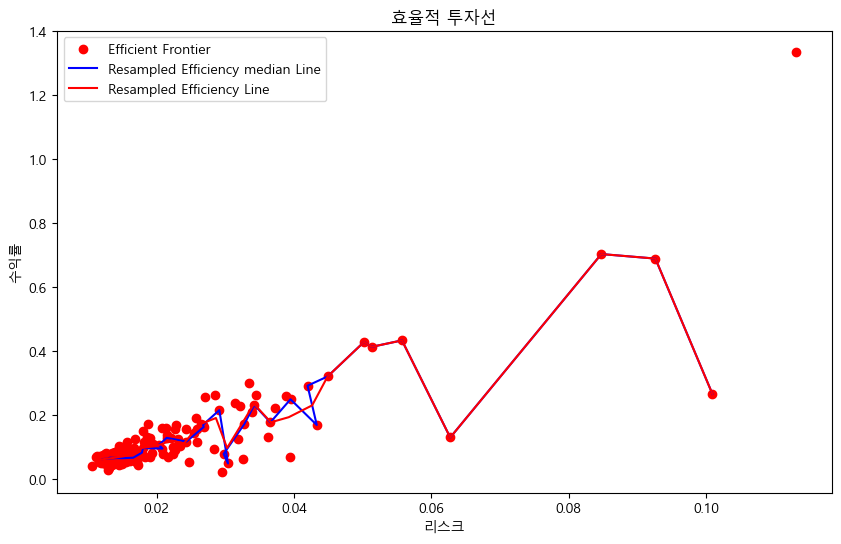

In [28]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
resampled_weight = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    resampled_weight = pd.concat([resampled_weight, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [29]:
median_xy_2015_h = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2015_h.columns = ['x', 'y']
median_xy_2015_h

,x,y
0,0.012093,0.061988
1,0.014250,0.065468
2,0.013112,0.065824
3,0.014995,0.064656
4,0.016566,0.066167
5,0.017845,0.081985
6,0.017991,0.096558
7,0.020834,0.094907
8,0.020319,0.106647
9,0.021458,0.128350


In [30]:
weight_2015 = resampled_weight
weight_2015

,0,1,2,3
0,1.958241e-02,0.000000e+00,4.567660e-02,9.347410e-01
1,0.000000e+00,2.240111e-02,8.726814e-02,8.903307e-01
2,1.900979e-13,2.117750e-14,1.651457e-14,1.000000e+00
3,9.837889e-02,0.000000e+00,3.552215e-01,5.464002e-01
4,5.568683e-02,1.206908e-11,0.000000e+00,9.443132e-01
5,2.830083e-02,3.010188e-02,3.327834e-01,6.088139e-01
6,0.000000e+00,3.404019e-02,1.309943e-01,8.349655e-01
7,0.000000e+00,3.631316e-02,3.025294e-02,9.334339e-01
8,0.000000e+00,4.412381e-02,6.930973e-14,9.558762e-01
9,7.934191e-16,4.800659e-02,1.268677e-01,8.251257e-01


## 2016

In [31]:
rf.iloc[1]

한국 1년 채권 수익률    0.0146
Name: 2016, dtype: float64

In [32]:
# 목적 함수 (최소화할 함수: 샤프 비율의 음수값) - 목적함수 minimize
risk_free_rate = 0.01460
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01460):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [33]:
kospi = data_1['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_1['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_1['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_1['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 207 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 181 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 209 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\1394277956.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 187 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 186 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 204 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 182 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 203 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 214 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 193 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 194 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 209 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 214 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 204 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 187 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 196 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 205 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 194 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 188 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 187 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 205 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 205 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 188 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 187 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 173 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 183 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


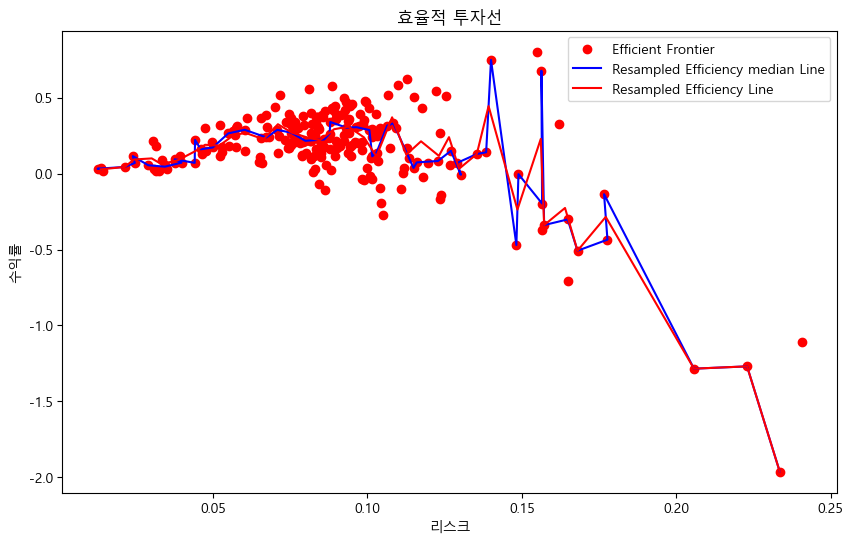

In [34]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2016 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2016 = pd.concat([weight_2016, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [35]:
median_xy_2016_h = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2016_h.columns = ['x', 'y']
median_xy_2016_h

,x,y
0,0.013726,0.029672
1,0.012653,0.031975
2,0.021448,0.043674
3,0.024686,0.069984
4,0.024042,0.115066
5,0.029025,0.054854
6,0.034443,0.045462
7,0.039806,0.071991
8,0.037600,0.093819
9,0.044073,0.070503


## 2017

In [36]:
risk_free_rate = 0.01435
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01435):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [37]:
kospi = data_2['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_2['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_2['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_2['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 493 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 497 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 509 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 528 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 551 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 529 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 517 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\1428722453.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 568 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 519 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000
수락된 프로포절의 수: 497 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000
수락된 프로포절의 수: 508 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 537 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 518 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 539 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 524 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 509 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 509 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000
수락된 프로포절의 수: 508 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 508 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 522 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 515 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 544 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 503 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 499 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000
수락된 프로포절의 수: 516 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 499 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 529 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 499 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 517 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 526 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 499 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 524 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000
수락된 프로포절의 수: 511 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 518 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 541 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 511 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 503 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 528 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 532 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 518 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 521 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 526 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000
수락된 프로포절의 수: 536 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 493 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 528 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000
수락된 프로포절의 수: 521 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 493 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000
수락된 프로포절의 수: 508 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 530 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000
수락된 프로포절의 수: 535 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000
수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 503 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 522 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 526 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 519 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 522 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 519 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 508 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 499 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 498 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 497 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 524 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 511 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 545 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 498 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 539 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 525 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 516 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 536 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 484 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 508 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 546 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 503 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000
수락된 프로포절의 수: 509 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 499 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 503 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 545 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 508 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 503 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 515 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 531 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 514 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 527 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 536 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 498 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 498 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 484 제안된 프로포절 수: 1000
수락된 프로포절의 수: 524 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000
수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 514 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 550 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 493 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 517 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 503 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 508 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 484 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 525 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 514 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


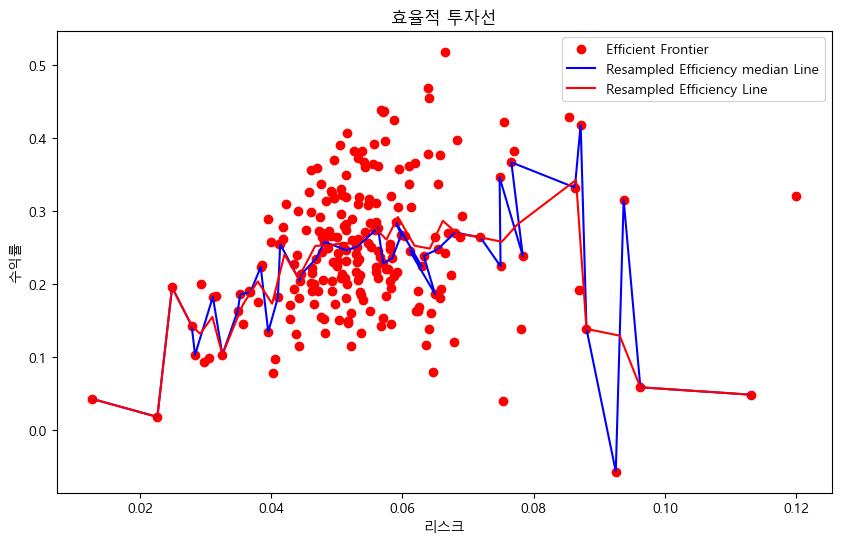

In [38]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2017 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2017 = pd.concat([weight_2017, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [39]:
median_xy_2017_h = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2017_h.columns = ['x', 'y']
median_xy_2017_h

,x,y
0,0.012682,0.042676
1,0.022658,0.017784
2,0.024900,0.195458
3,0.027887,0.143037
4,0.028398,0.103017
5,0.031116,0.182533
6,0.032567,0.103270
7,0.034915,0.163686
8,0.035283,0.185884
9,0.036844,0.188991


## 2018

In [40]:
risk_free_rate = 0.01761
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01761):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [41]:
kospi = data_3['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_3['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_3['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_3['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 201 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 203 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 185 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 179 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 194 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 181 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\1564574342.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 188 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 171 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 76 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 155 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 205 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 173 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 201 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 153 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 98 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 179 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 164 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 162 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 162 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 194 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 167 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 173 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 164 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 209 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 187 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 185 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 188 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 181 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 204 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 201 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 197 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 193 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 59 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 196 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 182 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 92 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 92 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 181 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 196 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 153 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 199 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 202 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 207 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 222 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 204 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 209 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 179 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 167 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 189 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 206 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 205 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 182 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 191 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 182 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 199 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 209 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 188 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 206 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 185 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 204 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 201 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 162 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 183 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 71 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 164 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 70 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 196 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 161 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 179 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 207 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 205 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 202 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 197 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 51 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 153 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 196 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 169 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 179 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 156 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 187 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


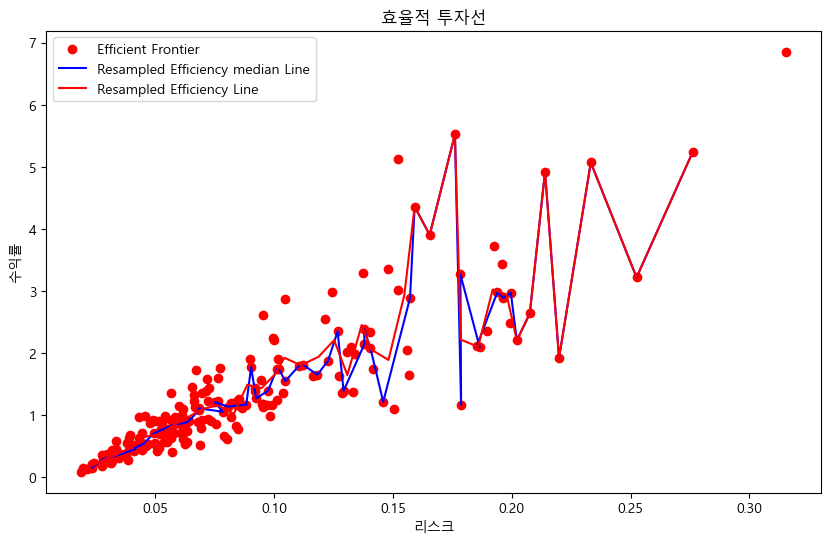

In [42]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2018 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2018 = pd.concat([weight_2018, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [43]:
median_xy_2018_h = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2018_h.columns = ['x', 'y']
median_xy_2018_h

,x,y
0,0.023281,0.156329
1,0.027891,0.297345
2,0.033155,0.346447
3,0.041532,0.455899
4,0.041342,0.476136
5,0.044986,0.542743
6,0.049230,0.709976
7,0.057927,0.854557
8,0.060184,0.863363
9,0.063249,0.887141


## 2019

In [44]:
risk_free_rate = 0.01765
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01765):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [45]:
kospi = data_4['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_4['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_4['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_4['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3661837062.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 204 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 209 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 194 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 487 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 214 제안된 프로포절 수: 1000
수락된 프로포절의 수: 207 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 488 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 205 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 203 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 209 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


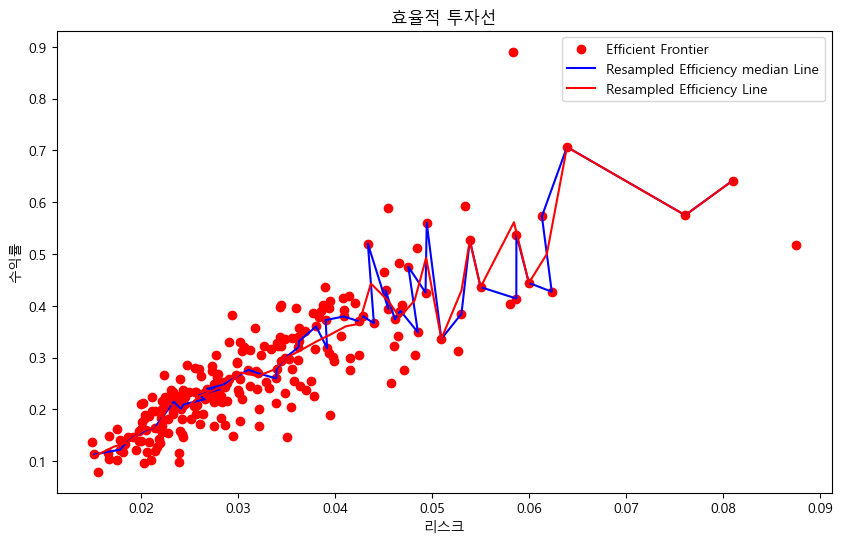

In [46]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2019 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2019 = pd.concat([weight_2019, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [47]:
median_xy_2019_h = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2019_h.columns = ['x', 'y']
median_xy_2019_h

,x,y
0,0.015135,0.113014
1,0.017833,0.122223
2,0.018358,0.133782
3,0.019142,0.145845
4,0.020537,0.160208
5,0.021371,0.164307
6,0.023367,0.214824
7,0.024072,0.200036
8,0.024368,0.209522
9,0.026533,0.219470


## 2020

In [48]:
risk_free_rate = 0.01106
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01106):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [49]:
kospi = data_5['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_5['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_5['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_5['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 67 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 86 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 16 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 32 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\4162743637.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 186 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 84 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 64 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 73 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 72 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 61 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 182 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 80 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 74 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 484 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 57 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 84 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 198 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 181 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 78 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 41 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 196 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 70 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 484 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 53 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 49 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 186 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 57 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 207 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 90 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 45 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 76 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 90 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 188 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 76 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 185 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 50 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 75 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 72 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 52 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 179 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 79 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 81 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 205 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 84 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 185 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 494 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 179 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 484 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 87 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 82 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 50 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 82 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 70 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 62 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 63 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 173 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 493 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 43 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 173 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 77 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 60 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 77 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 497 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 71 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 72 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 86 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 40 제안된 프로포절 수: 1000
수락된 프로포절의 수: 499 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 207 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 491 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 47 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 62 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


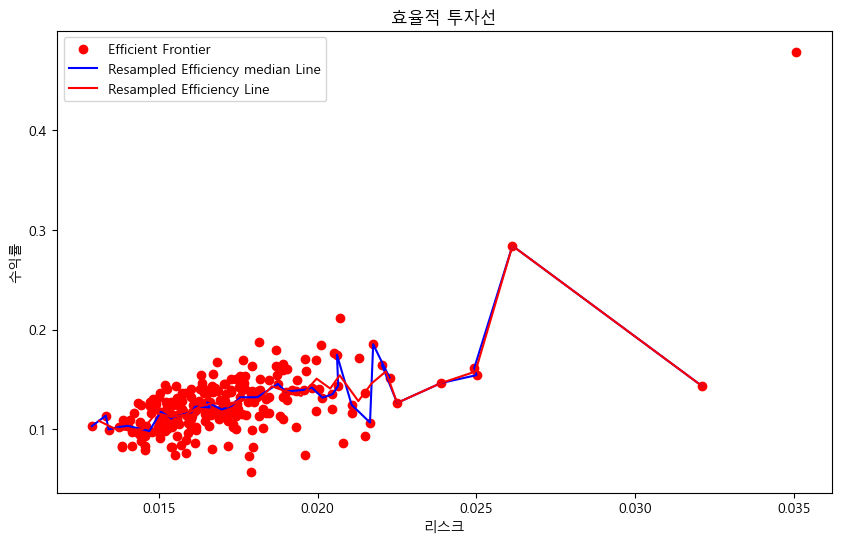

In [50]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2020 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2020 = pd.concat([weight_2020, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [51]:
median_xy_2020_h = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2020_h.columns = ['x', 'y']
median_xy_2020_h

,x,y
0,0.012889,0.103314
1,0.013330,0.113865
2,0.013413,0.099906
3,0.013745,0.102496
4,0.014028,0.103570
5,0.014700,0.098381
6,0.015060,0.117731
7,0.015397,0.110934
8,0.015428,0.112098
9,0.016030,0.117296


## 2021

In [52]:
risk_free_rate = 0.00619
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.00619):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [53]:
kospi = data_6['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_6['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_6['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_6['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\1681838651.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


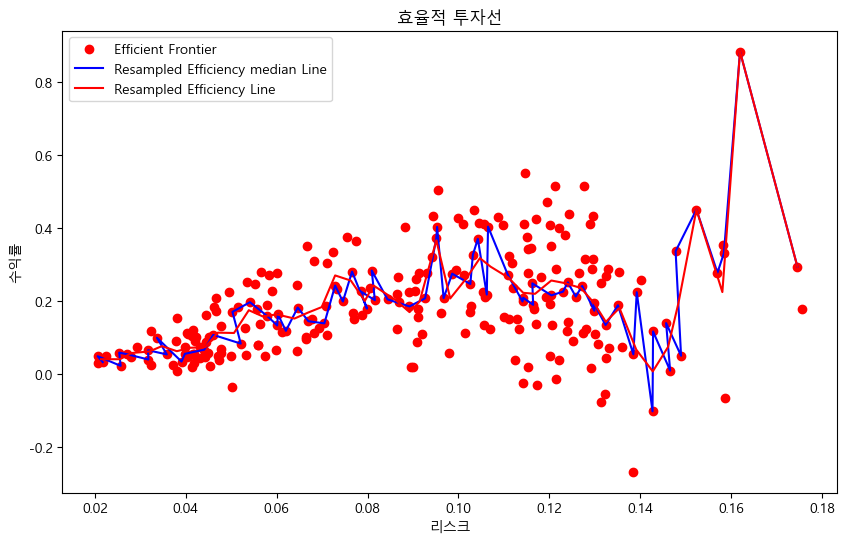

In [54]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2021 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2021 = pd.concat([weight_2021, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [55]:
median_xy_2021_h = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2021_h.columns = ['x', 'y']
median_xy_2021_h

,x,y
0,0.021723,0.033258
1,0.020602,0.049453
2,0.025665,0.023036
3,0.025356,0.059168
4,0.027086,0.054810
...,...,...
64,0.152369,0.450416
65,0.156990,0.277872
66,0.158403,0.330527
67,0.161957,0.882771


## 2022

In [56]:
risk_free_rate = 0.01496
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01496):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [57]:
kospi = data_7['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_7['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_7['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_7['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 84 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 81 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 74 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\3054713436.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 84 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 92 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 162 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 81 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 90 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 83 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 86 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 73 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 76 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 83 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 172 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 58 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 98 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 192 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 66 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 90 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 153 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 209 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 87 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 161 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 156 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 92 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 98 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 82 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 166 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 90 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 172 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 162 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 67 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 77 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000


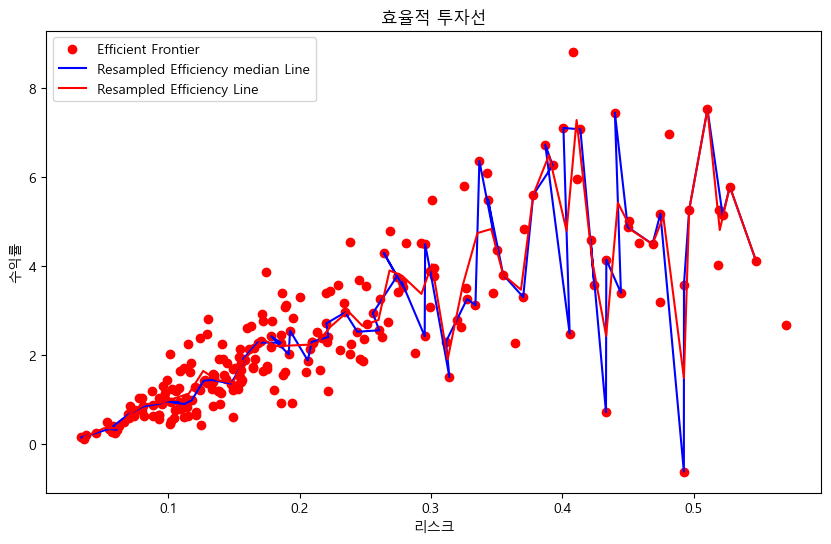

In [58]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2022 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2022 = pd.concat([weight_2022, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [59]:
median_xy_2022_h = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2022_h.columns = ['x', 'y']
median_xy_2022_h

,x,y
0,0.033849,0.152341
1,0.055248,0.344199
2,0.060828,0.323012
3,0.058181,0.406842
4,0.069796,0.671597
...,...,...
66,0.496580,5.270065
67,0.510482,7.525620
68,0.522066,5.143517
69,0.527500,5.788282


## 백테스트

In [60]:
import plotly.graph_objects as go # 그래프 그릴 때 사용할 라이브러리입니다.
from plotly.subplots import make_subplots
data

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return,S&P 500_cum,KSPI 200_cum,US_BOND_cum,KOR_BOND_cum,snp_exposure_return(cum),snp_hedged_return(cum),us_bond_exposure_return(cum),us_bond_hedged_return(cum)
Symbol Name,,,,,,,,,,,,
2014-04-01,NaN,NaN,NaN,NaN,0.007045,0.003254,-0.000960,-0.000033,0.004501,0.007044,-0.003483,-0.000960
2014-04-02,-0.110039,-0.594969,0.633146,5.098238,0.002853,0.002896,-0.001567,-0.000198,-0.002414,0.002852,-0.006812,-0.001568
2014-04-03,-1.478614,-1.394784,-1.226161,-1.331255,-0.001126,-0.001386,0.000354,0.000066,-0.004423,-0.001126,-0.002947,0.000355
2014-04-04,-1.361612,10.129908,5.497697,2.019219,-0.012537,0.000501,0.002303,0.000198,-0.011510,-0.012535,0.003346,0.002306
2014-04-07,2.229151,-0.142544,-0.517595,1.996190,-0.010750,0.001619,0.001111,0.000595,-0.012620,-0.010751,-0.000781,0.001111
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22,-1.677348,-1.996883,-0.882493,-0.332541,0.008731,0.012224,0.000140,-0.000792,0.015403,0.008734,0.006754,0.000143
2024-04-23,-1.208587,0.370327,5.332449,-1.875694,0.011965,-0.002550,0.000884,0.000694,0.008750,0.011964,-0.002295,0.000884
2024-04-24,-9.395032,-0.982198,-2.971940,-1.618120,0.000213,0.021406,-0.001744,-0.000429,-0.001743,0.000212,-0.003696,-0.001745


In [61]:
data1 = data.loc["2016-02-01":"2024-02-02"]
data1

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return,S&P 500_cum,KSPI 200_cum,US_BOND_cum,KOR_BOND_cum,snp_exposure_return(cum),snp_hedged_return(cum),us_bond_exposure_return(cum),us_bond_hedged_return(cum)
Symbol Name,,,,,,,,,,,,
2016-02-01,1.654253,-1.017901,-1.461088,-0.265436,-0.000443,0.006764,-0.001176,0.001285,-0.002263,-0.000447,-0.002995,-0.001180
2016-02-02,-2.625944,41.286185,-4.596067,-0.795135,-0.018743,-0.010998,0.004230,0.000263,-0.020126,-0.018740,0.002815,0.004234
2016-02-03,-0.161989,-1.266340,-1.158421,0.749540,0.004992,-0.009217,-0.000670,0.000460,0.003824,0.004989,-0.001832,-0.000673
2016-02-04,-2.866973,-0.694158,-2.715435,-0.430109,0.001527,0.017207,0.001150,0.000262,0.012848,0.001528,0.012467,0.001151
2016-02-05,-0.902690,-13.104806,-0.854334,-1.000000,-0.018481,0.001674,0.000167,0.000000,-0.029775,-0.018480,-0.011341,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,7.842797,-12.593764,-5.234559,-1.903568,0.007557,0.010861,0.003790,-0.001248,0.008236,0.007561,0.004466,0.003794
2024-01-30,-1.098108,-1.079486,-0.722265,-2.001250,-0.000601,-0.001066,0.001053,0.001250,-0.000376,-0.000602,0.001277,0.001051
2024-01-31,2.448119,25.813403,3.343254,-0.684801,-0.016106,-0.003674,0.004572,0.000394,-0.020742,-0.016101,-0.000162,0.004576


In [62]:
kospi_back = data.loc["2024-02-01","KSPI 200_cum"] - data.loc["2016-02-01","KSPI 200_cum"]
kor_bond = data.loc["2024-02-01","KOR_BOND_cum"] - data.loc["2016-02-01","KOR_BOND_cum"]

## invest_list

In [72]:
target_return = target_return.iloc[2:]

In [73]:
target_return = target_return.loc['2016':]
target_return

,목표수익률
2017,0.051017
2018,0.043835
2019,0.026296
2020,-0.001756
2021,0.068055
2022,0.077038
2023,0.049539


### 2015

In [122]:
weight_2015 = pd.read_csv('weight_2015_h.csv', index_col=0)
weight_2015 = pd.DataFrame(weight_2015)
weight_2015.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2015.head(5)

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
0,9.516078e-15,7.070511e-14,0.178581,0.821419
1,2.229514e-02,1.973470e-02,0.040467,0.917503
2,2.670661e-13,3.611795e-02,0.066262,0.897620
3,0.000000e+00,4.158451e-02,0.031182,0.927233
4,1.192238e-02,6.301532e-02,0.115603,0.809460


In [123]:
median_xy_2015 = pd.read_csv('median_xy_2015_h.csv', encoding='EUC-KR', index_col=0)
median_xy_2015.head(5)

,x,y
0,0.012093,0.061988
1,0.014250,0.065468
2,0.013112,0.065824
3,0.014995,0.064656
4,0.016566,0.066167


In [76]:
target_return

,목표수익률
2017,0.051017
2018,0.043835
2019,0.026296
2020,-0.001756
2021,0.068055
2022,0.077038
2023,0.049539


In [130]:
inv_2015 = median_xy_2015[median_xy_2015['x'] >  0.039213]
inv_2015_idx = inv_2015.index[0]
inv_list_2015 = weight_2015.loc[inv_2015_idx]
inv_list_2015

KOSPI 200_return    2.679997e-16
S&P 500_return      2.889425e-01
US_BOND_return      4.714902e-02
KOR_BOND_return     6.639085e-01
Name: 19, dtype: float64

In [131]:
invest_weight = pd.DataFrame()
invest_weight['weight_2016'] = inv_list_2015
invest_weight

,weight_2016
KOSPI 200_return,2.679997e-16
S&P 500_return,2.889425e-01
US_BOND_return,4.714902e-02
KOR_BOND_return,6.639085e-01


### 2016

In [132]:
weight_2016 = pd.read_csv('weight_2016_h.csv', index_col=0)
weight_2016 = pd.DataFrame(weight_2016)
weight_2016.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2016.head(5)

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
0,0.231579,7.329813e-03,0.000000,0.761091
1,0.248576,5.376803e-10,0.000000,0.751424
2,0.095058,0.000000e+00,0.368746,0.536196
3,0.344460,7.985305e-12,0.311476,0.344064
4,0.338733,0.000000e+00,0.347433,0.313834


In [133]:
median_xy_2016 = pd.read_csv('median_xy_2016_h.csv', index_col=0, encoding='EUC-KR')
median_xy_2016.head(5)

,x,y
0,0.013726,0.029672
1,0.012653,0.031975
2,0.021448,0.043674
3,0.024686,0.069984
4,0.024042,0.115066


In [134]:
target_return.loc[2017]

목표수익률    0.051017
Name: 2017, dtype: float64

In [135]:
inv_2016 = median_xy_2016[median_xy_2016['x'] > 0.051017]
inv_2016_idx = inv_2016.index[0]
inv_list_2016 = weight_2016.loc[inv_2016_idx]
inv_list_2016

KOSPI 200_return    0.832721
S&P 500_return      0.000000
US_BOND_return      0.167279
KOR_BOND_return     0.000000
Name: 13, dtype: float64

In [136]:
invest_weight['weight_2017'] = inv_list_2016
invest_weight

,weight_2016,weight_2017
KOSPI 200_return,2.679997e-16,0.832721
S&P 500_return,2.889425e-01,0.000000
US_BOND_return,4.714902e-02,0.167279
KOR_BOND_return,6.639085e-01,0.000000


### 2017

In [137]:
weight_2017 = pd.read_csv('weight_2017_h.csv', index_col=0)
weight_2017 = pd.DataFrame(weight_2017)
weight_2017.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2017.head(5)

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
0,0.000000,0.000000e+00,0.000000e+00,1.000000
1,0.089115,0.000000e+00,5.287165e-12,0.910885
2,0.243624,0.000000e+00,4.729843e-02,0.709078
3,0.080884,0.000000e+00,3.555566e-01,0.563559
4,0.293047,4.848632e-14,1.571718e-02,0.691236


In [138]:
target_return.loc[2018]

목표수익률    0.043835
Name: 2018, dtype: float64

In [139]:
median_xy_2017 = pd.read_csv('median_xy_2017_h.csv', index_col=0, encoding='EUC-KR')
median_xy_2017.head(5)

,x,y
0,0.012682,0.042676
1,0.022658,0.017784
2,0.024900,0.195458
3,0.027887,0.143037
4,0.028398,0.103017


In [140]:
inv_2017 = median_xy_2017[median_xy_2017['x'] > 0.051017]
inv_2017_idx = inv_2017.index[0]
inv_list_2017 = weight_2017.loc[inv_2017_idx]
inv_list_2017

KOSPI 200_return    7.805743e-01
S&P 500_return      1.733679e-01
US_BOND_return      4.605781e-02
KOR_BOND_return     1.069294e-16
Name: 18, dtype: float64

In [141]:
invest_weight['weight_2018'] = inv_list_2017
invest_weight

,weight_2016,weight_2017,weight_2018
KOSPI 200_return,2.679997e-16,0.832721,7.805743e-01
S&P 500_return,2.889425e-01,0.000000,1.733679e-01
US_BOND_return,4.714902e-02,0.167279,4.605781e-02
KOR_BOND_return,6.639085e-01,0.000000,1.069294e-16


### 2018

In [142]:
weight_2018 = pd.read_csv('weight_2018_h.csv', index_col=0)
weight_2018 = pd.DataFrame(weight_2018)
weight_2018.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2018.head(5)

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
0,4.125053e-13,0.065459,3.194586e-01,0.615082
1,2.799461e-02,0.078618,3.563637e-16,0.893387
2,3.261621e-02,0.088879,2.298419e-01,0.648662
3,8.935504e-03,0.120550,2.667344e-01,0.603780
4,9.971618e-03,0.109501,1.137775e-01,0.766750


In [143]:
target_return.loc[2019]

목표수익률    0.026296
Name: 2019, dtype: float64

In [144]:
median_xy_2018 = pd.read_csv('median_xy_2018_h.csv', index_col=0, encoding='EUC-KR')
median_xy_2018.head(5)

,x,y
0,0.023281,0.156329
1,0.027891,0.297345
2,0.033155,0.346447
3,0.041532,0.455899
4,0.041342,0.476136


In [145]:
inv_2018 = median_xy_2018[median_xy_2018['x'] > 0.026296]
inv_2018_idx = inv_2018.index[0]
inv_list_2018 = weight_2018.loc[inv_2018_idx]
inv_list_2018

KOSPI 200_return    2.799461e-02
S&P 500_return      7.861829e-02
US_BOND_return      3.563637e-16
KOR_BOND_return     8.933871e-01
Name: 1, dtype: float64

In [146]:
invest_weight['weight_2019'] = inv_list_2018
invest_weight

,weight_2016,weight_2017,weight_2018,weight_2019
KOSPI 200_return,2.679997e-16,0.832721,7.805743e-01,2.799461e-02
S&P 500_return,2.889425e-01,0.000000,1.733679e-01,7.861829e-02
US_BOND_return,4.714902e-02,0.167279,4.605781e-02,3.563637e-16
KOR_BOND_return,6.639085e-01,0.000000,1.069294e-16,8.933871e-01


### 2019

In [147]:
weight_2019 = pd.read_csv('weight_2019_h.csv', index_col=0)
weight_2019 = pd.DataFrame(weight_2019)
weight_2019.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2019.head(5)

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
0,3.135961e-02,0.041730,0.355244,0.571666
1,1.480185e-02,0.073452,0.331074,0.580672
2,7.597627e-02,0.059781,0.339570,0.524672
3,1.412580e-16,0.098606,0.357232,0.544162
4,5.228276e-02,0.137051,0.415417,0.395249


In [148]:
target_return.loc[2020]

목표수익률   -0.001756
Name: 2020, dtype: float64

In [149]:
median_xy_2019 = pd.read_csv('median_xy_2019_h.csv', index_col=0, encoding='EUC-KR')
median_xy_2019.head(5)

,x,y
0,0.015135,0.113014
1,0.017833,0.122223
2,0.018358,0.133782
3,0.019142,0.145845
4,0.020537,0.160208


In [150]:
inv_2019 = median_xy_2019[median_xy_2019['x'] > -0.001756]
inv_2019_idx = inv_2019.index[0]
inv_list_2019 = weight_2019.loc[inv_2019_idx]
inv_list_2019

KOSPI 200_return    0.031360
S&P 500_return      0.041730
US_BOND_return      0.355244
KOR_BOND_return     0.571666
Name: 0, dtype: float64

In [151]:
invest_weight['weight_2020'] = inv_list_2019
invest_weight

,weight_2016,weight_2017,weight_2018,weight_2019,weight_2020
KOSPI 200_return,2.679997e-16,0.832721,7.805743e-01,2.799461e-02,0.031360
S&P 500_return,2.889425e-01,0.000000,1.733679e-01,7.861829e-02,0.041730
US_BOND_return,4.714902e-02,0.167279,4.605781e-02,3.563637e-16,0.355244
KOR_BOND_return,6.639085e-01,0.000000,1.069294e-16,8.933871e-01,0.571666


### 2020

In [152]:
weight_2020 = pd.read_csv('weight_2020_h.csv', index_col=0)
weight_2020 = pd.DataFrame(weight_2020)
weight_2020.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2020.head(5)

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
0,0.012375,0.0,0.090250,0.897375
1,0.007155,0.0,0.056247,0.936598
2,0.011279,0.0,0.083327,0.905394
3,0.006693,0.0,0.107775,0.885532
4,0.010585,0.0,0.071499,0.917916


In [153]:
target_return.loc[2021]

목표수익률    0.068055
Name: 2021, dtype: float64

In [154]:
median_xy_2020 = pd.read_csv('median_xy_2020_h.csv', index_col=0, encoding='EUC-KR')
median_xy_2020.head(5)

,x,y
0,0.012889,0.103314
1,0.013330,0.113865
2,0.013413,0.099906
3,0.013745,0.102496
4,0.014028,0.103570


In [155]:
inv_2020 = median_xy_2020[median_xy_2020['x'] >  0.068055]
inv_2020_idx = inv_2020.index[0]
inv_list_2020 = weight_2020.loc[inv_2020_idx]
inv_list_2020
# 해당하는 포트폴리오가 없음 -> 가장 안정성이 높은 포트폴리오로 투자

IndexError: index 0 is out of bounds for axis 0 with size 0

In [156]:
inv_2020 = median_xy_2020[median_xy_2020['y'] == np.min(median_xy_2020['y'])]
inv_2020_idx = inv_2020.index[0]
inv_list_2020 = weight_2020.loc[inv_2020_idx]
inv_list_2020

KOSPI 200_return    2.298625e-02
S&P 500_return      3.145711e-17
US_BOND_return      9.765465e-02
KOR_BOND_return     8.793591e-01
Name: 5, dtype: float64

In [157]:
invest_weight['weight_2021'] = inv_list_2020
invest_weight

,weight_2016,weight_2017,weight_2018,weight_2019,weight_2020,weight_2021
KOSPI 200_return,2.679997e-16,0.832721,7.805743e-01,2.799461e-02,0.031360,2.298625e-02
S&P 500_return,2.889425e-01,0.000000,1.733679e-01,7.861829e-02,0.041730,3.145711e-17
US_BOND_return,4.714902e-02,0.167279,4.605781e-02,3.563637e-16,0.355244,9.765465e-02
KOR_BOND_return,6.639085e-01,0.000000,1.069294e-16,8.933871e-01,0.571666,8.793591e-01


### 2021

In [158]:
weight_2021 = pd.read_csv('weight_2021_h.csv', index_col=0)
weight_2021 = pd.DataFrame(weight_2021)
weight_2021.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2021.head(5)

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
0,5.211210e-02,9.807991e-02,4.080141e-16,0.849808
1,2.632337e-10,2.491546e-10,3.595682e-01,0.640432
2,1.582107e-01,0.000000e+00,0.000000e+00,0.841789
3,0.000000e+00,1.515546e-01,3.516126e-16,0.848445
4,1.708777e-01,2.212322e-03,0.000000e+00,0.826910


In [159]:
target_return.loc[2022]

목표수익률    0.077038
Name: 2022, dtype: float64

In [161]:
median_xy_2021 = pd.read_csv('median_xy_2021_h.csv', index_col=0, encoding='EUC-KR')
median_xy_2021.head(5)

,x,y
0,0.021723,0.033258
1,0.020602,0.049453
2,0.025665,0.023036
3,0.025356,0.059168
4,0.027086,0.054810


In [162]:
inv_2021 = median_xy_2021[median_xy_2021['x'] > 0.077038]
inv_2021_idx = inv_2021.index[0]
inv_list_2021 = weight_2021.loc[inv_2021_idx]
inv_list_2021

KOSPI 200_return    4.193377e-03
S&P 500_return      7.174257e-01
US_BOND_return      2.783810e-01
KOR_BOND_return     6.437450e-17
Name: 26, dtype: float64

In [164]:
invest_weight['weight_2022'] = inv_list_2021
invest_weight

,weight_2016,weight_2017,weight_2018,weight_2019,weight_2020,weight_2021,weight_2022
KOSPI 200_return,2.679997e-16,0.832721,7.805743e-01,2.799461e-02,0.031360,2.298625e-02,4.193377e-03
S&P 500_return,2.889425e-01,0.000000,1.733679e-01,7.861829e-02,0.041730,3.145711e-17,7.174257e-01
US_BOND_return,4.714902e-02,0.167279,4.605781e-02,3.563637e-16,0.355244,9.765465e-02,2.783810e-01
KOR_BOND_return,6.639085e-01,0.000000,1.069294e-16,8.933871e-01,0.571666,8.793591e-01,6.437450e-17


### 2022

In [165]:
weight_2022 = pd.read_csv('weight_2022_h.csv', index_col=0)
weight_2022 = pd.DataFrame(weight_2022)
weight_2022.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2022.head(5)

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
0,2.575752e-12,0.018612,0.050346,0.931042
1,0.000000e+00,0.107987,0.151066,0.740947
2,3.138765e-17,0.104850,0.332903,0.562247
3,1.084202e-19,0.099482,0.085800,0.814718
4,1.231112e-16,0.140961,0.117163,0.741876


In [166]:
target_return.loc[2023]

목표수익률    0.049539
Name: 2023, dtype: float64

In [167]:
median_xy_2022 = pd.read_csv('median_xy_2022_h.csv', index_col=0, encoding='EUC-KR')
median_xy_2022.head(5)

,x,y
0,0.033849,0.152341
1,0.055248,0.344199
2,0.060828,0.323012
3,0.058181,0.406842
4,0.069796,0.671597


In [168]:
inv_2022 = median_xy_2022[median_xy_2022['x'] > 0.049539]
inv_2022_idx = inv_2022.index[0]
inv_list_2022 = weight_2022.loc[inv_2022_idx]
inv_list_2022

KOSPI 200_return    0.000000
S&P 500_return      0.107987
US_BOND_return      0.151066
KOR_BOND_return     0.740947
Name: 1, dtype: float64

In [169]:
invest_weight['weight_2023'] = inv_list_2022
invest_weight

,weight_2016,weight_2017,weight_2018,weight_2019,weight_2020,weight_2021,weight_2022,weight_2023
KOSPI 200_return,2.679997e-16,0.832721,7.805743e-01,2.799461e-02,0.031360,2.298625e-02,4.193377e-03,0.000000
S&P 500_return,2.889425e-01,0.000000,1.733679e-01,7.861829e-02,0.041730,3.145711e-17,7.174257e-01,0.107987
US_BOND_return,4.714902e-02,0.167279,4.605781e-02,3.563637e-16,0.355244,9.765465e-02,2.783810e-01,0.151066
KOR_BOND_return,6.639085e-01,0.000000,1.069294e-16,8.933871e-01,0.571666,8.793591e-01,6.437450e-17,0.740947


## 진짜 계산

In [170]:
invest_weight = invest_weight.T

In [171]:
invest_weight

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return
weight_2016,2.679997e-16,2.889425e-01,4.714902e-02,6.639085e-01
weight_2017,8.327210e-01,0.000000e+00,1.672790e-01,0.000000e+00
weight_2018,7.805743e-01,1.733679e-01,4.605781e-02,1.069294e-16
weight_2019,2.799461e-02,7.861829e-02,3.563637e-16,8.933871e-01
weight_2020,3.135961e-02,4.173027e-02,3.552438e-01,5.716663e-01
weight_2021,2.298625e-02,3.145711e-17,9.765465e-02,8.793591e-01
weight_2022,4.193377e-03,7.174257e-01,2.783810e-01,6.437450e-17
weight_2023,0.000000e+00,1.079872e-01,1.510658e-01,7.409471e-01


In [172]:
data1

,KOSPI 200_return,S&P 500_return,US_BOND_return,KOR_BOND_return,S&P 500_cum,KSPI 200_cum,US_BOND_cum,KOR_BOND_cum,snp_exposure_return(cum),snp_hedged_return(cum),us_bond_exposure_return(cum),us_bond_hedged_return(cum)
Symbol Name,,,,,,,,,,,,
2016-02-01,1.654253,-1.017901,-1.461088,-0.265436,-0.000443,0.006764,-0.001176,0.001285,-0.002263,-0.000447,-0.002995,-0.001180
2016-02-02,-2.625944,41.286185,-4.596067,-0.795135,-0.018743,-0.010998,0.004230,0.000263,-0.020126,-0.018740,0.002815,0.004234
2016-02-03,-0.161989,-1.266340,-1.158421,0.749540,0.004992,-0.009217,-0.000670,0.000460,0.003824,0.004989,-0.001832,-0.000673
2016-02-04,-2.866973,-0.694158,-2.715435,-0.430109,0.001527,0.017207,0.001150,0.000262,0.012848,0.001528,0.012467,0.001151
2016-02-05,-0.902690,-13.104806,-0.854334,-1.000000,-0.018481,0.001674,0.000167,0.000000,-0.029775,-0.018480,-0.011341,0.000168
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,7.842797,-12.593764,-5.234559,-1.903568,0.007557,0.010861,0.003790,-0.001248,0.008236,0.007561,0.004466,0.003794
2024-01-30,-1.098108,-1.079486,-0.722265,-2.001250,-0.000601,-0.001066,0.001053,0.001250,-0.000376,-0.000602,0.001277,0.001051
2024-01-31,2.448119,25.813403,3.343254,-0.684801,-0.016106,-0.003674,0.004572,0.000394,-0.020742,-0.016101,-0.000162,0.004576


In [173]:
data2 = data.loc[:, 'S&P 500_cum':]
data2 = data2.iloc[1:]
data2

,S&P 500_cum,KSPI 200_cum,US_BOND_cum,KOR_BOND_cum,snp_exposure_return(cum),snp_hedged_return(cum),us_bond_exposure_return(cum),us_bond_hedged_return(cum)
Symbol Name,,,,,,,,
2014-04-02,0.002853,0.002896,-0.001567,-0.000198,-0.002414,0.002852,-0.006812,-0.001568
2014-04-03,-0.001126,-0.001386,0.000354,0.000066,-0.004423,-0.001126,-0.002947,0.000355
2014-04-04,-0.012537,0.000501,0.002303,0.000198,-0.011510,-0.012535,0.003346,0.002306
2014-04-07,-0.010750,0.001619,0.001111,0.000595,-0.012620,-0.010751,-0.000781,0.001111
2014-04-08,0.003751,0.002232,0.000454,-0.000099,0.001184,0.003752,-0.002104,0.000455
...,...,...,...,...,...,...,...,...
2024-04-22,0.008731,0.012224,0.000140,-0.000792,0.015403,0.008734,0.006754,0.000143
2024-04-23,0.011965,-0.002550,0.000884,0.000694,0.008750,0.011964,-0.002295,0.000884
2024-04-24,0.000213,0.021406,-0.001744,-0.000429,-0.001743,0.000212,-0.003696,-0.001745


In [174]:
data1_2016 = data2.loc['2016-02-02':'2017-02-01']
data1_2017 = data2.loc['2017-02-02':'2018-02-01']
data1_2018 = data2.loc['2018-02-02':'2019-02-01']
data1_2019 = data2.loc['2019-02-02':'2020-02-01']
data1_2020 = data2.loc['2020-02-02':'2021-02-01']
data1_2021 = data2.loc['2021-02-02':'2022-02-01']
data1_2022 = data2.loc['2022-02-02':'2023-02-01']
data1_2023 = data2.loc['2023-02-02':'2024-02-01']

In [175]:
data2_2016 = data1_2016[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2017 = data1_2017[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2018 = data1_2018[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2019 = data1_2019[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2020 = data1_2020[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2021 = data1_2021[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2022 = data1_2022[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2023 = data1_2023[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]

In [176]:
invest_list = pd.DataFrame(invest_weight)
invest_list.columns = [['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
invest_list

,KSPI 200_cum,snp_exposure_return(cum),us_bond_exposure_return(cum),KOR_BOND_cum
weight_2016,2.679997e-16,2.889425e-01,4.714902e-02,6.639085e-01
weight_2017,8.327210e-01,0.000000e+00,1.672790e-01,0.000000e+00
weight_2018,7.805743e-01,1.733679e-01,4.605781e-02,1.069294e-16
weight_2019,2.799461e-02,7.861829e-02,3.563637e-16,8.933871e-01
weight_2020,3.135961e-02,4.173027e-02,3.552438e-01,5.716663e-01
weight_2021,2.298625e-02,3.145711e-17,9.765465e-02,8.793591e-01
weight_2022,4.193377e-03,7.174257e-01,2.783810e-01,6.437450e-17
weight_2023,0.000000e+00,1.079872e-01,1.510658e-01,7.409471e-01


In [177]:
invest_list

,KSPI 200_cum,snp_exposure_return(cum),us_bond_exposure_return(cum),KOR_BOND_cum
weight_2016,2.679997e-16,2.889425e-01,4.714902e-02,6.639085e-01
weight_2017,8.327210e-01,0.000000e+00,1.672790e-01,0.000000e+00
weight_2018,7.805743e-01,1.733679e-01,4.605781e-02,1.069294e-16
weight_2019,2.799461e-02,7.861829e-02,3.563637e-16,8.933871e-01
weight_2020,3.135961e-02,4.173027e-02,3.552438e-01,5.716663e-01
weight_2021,2.298625e-02,3.145711e-17,9.765465e-02,8.793591e-01
weight_2022,4.193377e-03,7.174257e-01,2.783810e-01,6.437450e-17
weight_2023,0.000000e+00,1.079872e-01,1.510658e-01,7.409471e-01


In [178]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
weights_df = pd.DataFrame(invest_list)
weights_df = weights_df.reset_index(drop=True)
weights_df.index = years
weights_df

,KSPI 200_cum,snp_exposure_return(cum),us_bond_exposure_return(cum),KOR_BOND_cum
2016,2.679997e-16,2.889425e-01,4.714902e-02,6.639085e-01
2017,8.327210e-01,0.000000e+00,1.672790e-01,0.000000e+00
2018,7.805743e-01,1.733679e-01,4.605781e-02,1.069294e-16
2019,2.799461e-02,7.861829e-02,3.563637e-16,8.933871e-01
2020,3.135961e-02,4.173027e-02,3.552438e-01,5.716663e-01
2021,2.298625e-02,3.145711e-17,9.765465e-02,8.793591e-01
2022,4.193377e-03,7.174257e-01,2.783810e-01,6.437450e-17
2023,0.000000e+00,1.079872e-01,1.510658e-01,7.409471e-01


In [179]:
data2_2016['포트폴리오 가치'] = weights_df.iloc[0,0]*data2_2016['KSPI 200_cum'] + weights_df.iloc[0,1]*data2_2016['snp_exposure_return(cum)']+weights_df.iloc[0,2]*data2_2016['us_bond_exposure_return(cum)']+weights_df.iloc[0,3]*data2_2016['KOR_BOND_cum']
data2_2017['포트폴리오 가치'] = weights_df.iloc[1,0]*data2_2017['KSPI 200_cum'] + weights_df.iloc[1,1]*data2_2017['snp_exposure_return(cum)']+weights_df.iloc[1,2]*data2_2017['us_bond_exposure_return(cum)']+weights_df.iloc[1,3]*data2_2017['KOR_BOND_cum']
data2_2018['포트폴리오 가치'] = weights_df.iloc[2,0]*data2_2018['KSPI 200_cum'] + weights_df.iloc[2,1]*data2_2018['snp_exposure_return(cum)']+weights_df.iloc[2,2]*data2_2018['us_bond_exposure_return(cum)']+weights_df.iloc[2,3]*data2_2018['KOR_BOND_cum']
data2_2019['포트폴리오 가치'] = weights_df.iloc[3,0]*data2_2019['KSPI 200_cum'] + weights_df.iloc[3,1]*data2_2019['snp_exposure_return(cum)']+weights_df.iloc[3,2]*data2_2019['us_bond_exposure_return(cum)']+weights_df.iloc[3,3]*data2_2019['KOR_BOND_cum']
data2_2020['포트폴리오 가치'] = weights_df.iloc[4,0]*data2_2020['KSPI 200_cum'] + weights_df.iloc[4,1]*data2_2020['snp_exposure_return(cum)']+weights_df.iloc[4,2]*data2_2020['us_bond_exposure_return(cum)']+weights_df.iloc[4,3]*data2_2020['KOR_BOND_cum']
data2_2021['포트폴리오 가치'] = weights_df.iloc[5,0]*data2_2021['KSPI 200_cum'] + weights_df.iloc[5,1]*data2_2021['snp_exposure_return(cum)']+weights_df.iloc[5,2]*data2_2021['us_bond_exposure_return(cum)']+weights_df.iloc[5,3]*data2_2021['KOR_BOND_cum']
data2_2022['포트폴리오 가치'] = weights_df.iloc[6,0]*data2_2022['KSPI 200_cum'] + weights_df.iloc[6,1]*data2_2022['snp_exposure_return(cum)']+weights_df.iloc[6,2]*data2_2022['us_bond_exposure_return(cum)']+weights_df.iloc[6,3]*data2_2022['KOR_BOND_cum']
data2_2023['포트폴리오 가치'] = weights_df.iloc[7,0]*data2_2023['KSPI 200_cum'] + weights_df.iloc[7,1]*data2_2023['snp_exposure_return(cum)']+weights_df.iloc[7,2]*data2_2023['us_bond_exposure_return(cum)']+weights_df.iloc[7,3]*data2_2023['KOR_BOND_cum']
data2_2023

,KSPI 200_cum,snp_exposure_return(cum),us_bond_exposure_return(cum),KOR_BOND_cum,포트폴리오 가치
Symbol Name,,,,,
2023-02-02,0.008531,0.015194,0.000649,0.001843,0.003104
2023-02-03,0.005958,-0.020079,-0.016468,0.002408,-0.002872
2023-02-06,-0.021574,0.000299,0.001528,-0.004704,-0.003223
2023-02-07,0.005395,0.029627,0.015072,0.000268,0.005675
2023-02-08,0.015848,-0.004343,0.008530,-0.000636,0.000348
...,...,...,...,...,...
2024-01-26,0.001228,-0.003189,-0.003432,0.001381,0.000161
2024-01-29,0.010861,0.008236,0.004466,-0.001248,0.000639
2024-01-30,-0.001066,-0.000376,0.001277,0.001250,0.001078


In [180]:
merged_df = pd.concat([data2_2016['포트폴리오 가치'], data2_2017['포트폴리오 가치'], data2_2018['포트폴리오 가치'], data2_2019['포트폴리오 가치'], data2_2020['포트폴리오 가치'], data2_2021['포트폴리오 가치'], data2_2022['포트폴리오 가치'], data2_2023['포트폴리오 가치']], axis=0)
merged_df = pd.DataFrame(merged_df, columns= ['포트폴리오 가치'])
merged_df

,포트폴리오 가치
Symbol Name,
2016-02-02,-0.005508
2016-02-03,0.001324
2016-02-04,0.004474
2016-02-05,-0.009138
2016-02-11,-0.008248
...,...
2024-01-26,0.000161
2024-01-29,0.000639
2024-01-30,0.001078


In [181]:
merged_df['누적 포트폴리오 가치'] = (1+merged_df['포트폴리오 가치']).cumprod() - 1
merged_df = pd.DataFrame(merged_df)
merged_df = merged_df.iloc[:,1:]
merged_df

,누적 포트폴리오 가치
Symbol Name,
2016-02-02,-0.005508
2016-02-03,-0.004191
2016-02-04,0.000265
2016-02-05,-0.008876
2016-02-11,-0.017051
...,...
2024-01-26,0.195238
2024-01-29,0.196002
2024-01-30,0.197291


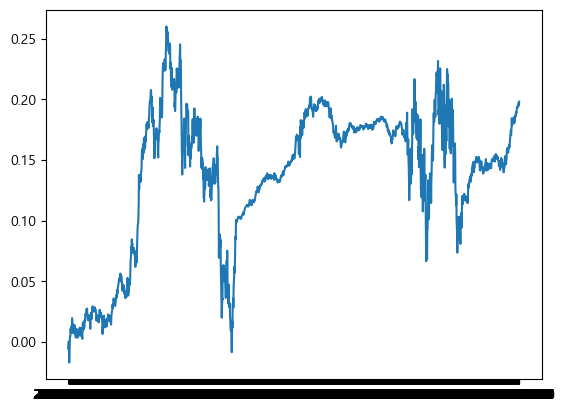

In [182]:
plt.plot(merged_df['누적 포트폴리오 가치'])

In [183]:
merged_df['누적 포트폴리오 가치'] = merged_df['누적 포트폴리오 가치'] + 1

In [184]:
merged_df

,누적 포트폴리오 가치
Symbol Name,
2016-02-02,0.994492
2016-02-03,0.995809
2016-02-04,1.000265
2016-02-05,0.991124
2016-02-11,0.982949
...,...
2024-01-26,1.195238
2024-01-29,1.196002
2024-01-30,1.197291


In [189]:
data10 = data2[['KSPI 200_cum','snp_hedged_return(cum)','us_bond_hedged_return(cum)','KOR_BOND_cum']]
data10 = data10.loc['2016-02-02':'2024-02-01']
data10

,KSPI 200_cum,snp_hedged_return(cum),us_bond_hedged_return(cum),KOR_BOND_cum
Symbol Name,,,,
2016-02-02,-0.010998,-0.018740,0.004234,0.000263
2016-02-03,-0.009217,0.004989,-0.000673,0.000460
2016-02-04,0.017207,0.001528,0.001151,0.000262
2016-02-05,0.001674,-0.018480,0.000168,0.000000
2016-02-11,-0.028290,-0.027109,0.007944,0.001939
...,...,...,...,...
2024-01-26,0.001228,-0.000654,-0.000897,0.001381
2024-01-29,0.010861,0.007561,0.003794,-0.001248
2024-01-30,-0.001066,-0.000602,0.001051,0.001250


In [190]:
data10['일일 벤치마크 가치_hedge'] = 0.3*data10['KSPI 200_cum'] + 0.3*data10['snp_hedged_return(cum)']+0.2*data10['us_bond_hedged_return(cum)']+0.2*data10['KOR_BOND_cum']
data10

,KSPI 200_cum,snp_hedged_return(cum),us_bond_hedged_return(cum),KOR_BOND_cum,일일 벤치마크 가치_hedge
Symbol Name,,,,,
2016-02-02,-0.010998,-0.018740,0.004234,0.000263,-0.008022
2016-02-03,-0.009217,0.004989,-0.000673,0.000460,-0.001311
2016-02-04,0.017207,0.001528,0.001151,0.000262,0.005903
2016-02-05,0.001674,-0.018480,0.000168,0.000000,-0.005008
2016-02-11,-0.028290,-0.027109,0.007944,0.001939,-0.014643
...,...,...,...,...,...
2024-01-26,0.001228,-0.000654,-0.000897,0.001381,0.000269
2024-01-29,0.010861,0.007561,0.003794,-0.001248,0.006036
2024-01-30,-0.001066,-0.000602,0.001051,0.001250,-0.000040


In [194]:
data10['누적 벤치마크 가치_hedge'] = (1+data10['일일 벤치마크 가치_hedge']).cumprod() - 1
data10

,KSPI 200_cum,snp_hedged_return(cum),us_bond_hedged_return(cum),KOR_BOND_cum,일일 벤치마크 가치_hedge,누적 벤치마크 가치_hedge
Symbol Name,,,,,,
2016-02-02,-0.010998,-0.018740,0.004234,0.000263,-0.008022,-0.008022
2016-02-03,-0.009217,0.004989,-0.000673,0.000460,-0.001311,-0.009322
2016-02-04,0.017207,0.001528,0.001151,0.000262,0.005903,-0.003474
2016-02-05,0.001674,-0.018480,0.000168,0.000000,-0.005008,-0.008465
2016-02-11,-0.028290,-0.027109,0.007944,0.001939,-0.014643,-0.022984
...,...,...,...,...,...,...
2024-01-26,0.001228,-0.000654,-0.000897,0.001381,0.000269,0.597928
2024-01-29,0.010861,0.007561,0.003794,-0.001248,0.006036,0.607573
2024-01-30,-0.001066,-0.000602,0.001051,0.001250,-0.000040,0.607509


In [196]:
# 초기 자본 1억원
data10['누적 벤치마크 가치_hedge'] = data10['누적 벤치마크 가치_hedge'] + 1
data10

,KSPI 200_cum,snp_hedged_return(cum),us_bond_hedged_return(cum),KOR_BOND_cum,일일 벤치마크 가치_hedge,누적 벤치마크 가치_hedge
Symbol Name,,,,,,
2016-02-02,-0.010998,-0.018740,0.004234,0.000263,-0.008022,0.991978
2016-02-03,-0.009217,0.004989,-0.000673,0.000460,-0.001311,0.990678
2016-02-04,0.017207,0.001528,0.001151,0.000262,0.005903,0.996526
2016-02-05,0.001674,-0.018480,0.000168,0.000000,-0.005008,0.991535
2016-02-11,-0.028290,-0.027109,0.007944,0.001939,-0.014643,0.977016
...,...,...,...,...,...,...
2024-01-26,0.001228,-0.000654,-0.000897,0.001381,0.000269,1.597928
2024-01-29,0.010861,0.007561,0.003794,-0.001248,0.006036,1.607573
2024-01-30,-0.001066,-0.000602,0.001051,0.001250,-0.000040,1.607509


In [197]:
merged_df

,누적 포트폴리오 가치
Symbol Name,
2016-02-02,0.994492
2016-02-03,0.995809
2016-02-04,1.000265
2016-02-05,0.991124
2016-02-11,0.982949
...,...
2024-01-26,1.195238
2024-01-29,1.196002
2024-01-30,1.197291


In [198]:
# CAGR : 연평균 성장률 ( Compound Annual Growth Rate)
num_of_year = int(len(merged_df)/237)

CAGR_exposured = ((data10['누적 벤치마크 가치_hedge'][-1]/1)** (1 / num_of_year)) - 1
print('벤치마크 가치_hedge CAGR은 {} %'.format(CAGR_exposured*100))

CAGR_port = (merged_df.iloc[-1, 0]/1)**(1/num_of_year) - 1
print('포트폴리오 CAGR은 {} %'.format(CAGR_port*100))

벤치마크 가치_hedge CAGR은 6.182822121564668 %
포트폴리오 CAGR은 2.285200847249591 %


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2386213407.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [199]:
#MDD : 최저점이 최고점 대비 몇퍼센트의 하락인지?
# (최고점 - 최저점) / 최고점

max_list = [merged_df.iloc[0,0]]
min_list = [merged_df.iloc[0,0]]

for i in range(len(merged_df)):
    if i==0:
        max_list.append(merged_df.iloc[0,0])
        min_list.append(merged_df.iloc[0,0])

    else:
        if merged_df.iloc[i, 0] >= merged_df.iloc[i-1,0]:
            max_list.append(merged_df.iloc[i, 0])
            min_list.append(merged_df.iloc[i, 0])
        else:
            if(max_list[-1]>merged_df.iloc[:i,0].max()):
                max_list.append(max_list[-1])
            else:
                max_list.append(merged_df.iloc[:i,0].max())
            min_list.append(merged_df.iloc[i, 0])


max_list = max_list[1:]
min_list = min_list[1:]
merged_df['max'] = max_list
merged_df['min'] = min_list
merged_df['mdd'] = -((merged_df['max'] - merged_df['min'])/merged_df['max'])

print('포트폴리오 MDD는 {}%'.format(merged_df['mdd'].min()*100))

merged_df['MDD'] = 0
for i in range(len(merged_df)):
    if i != 0:
        merged_df.iloc[i, -1] = merged_df['mdd'][:i].min()

포트폴리오 MDD는 -21.322465681497114%


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\2310829306.py:35: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.009138031138154031' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [200]:
# (최고점 - 최저점) / 최고점

max_list = [data10.iloc[0,5]]
min_list = [data10.iloc[0,5]]

for i in range(len(data10)):
    if i==0:
        max_list.append(data10.iloc[0,5])
        min_list.append(data10.iloc[0,5])

    else:
        if data10.iloc[i, 5] >= data10.iloc[i-1,5]:
            max_list.append(data10.iloc[i, 5])
            min_list.append(data10.iloc[i, 5])
        else:
            if(max_list[-1]>data10.iloc[:i,5].max()):
                max_list.append(max_list[-1])
            else:
                max_list.append(data10.iloc[:i,5].max())
            min_list.append(data10.iloc[i, 5])


max_list = max_list[1:]
min_list = min_list[1:]
data10['max'] = max_list
data10['min'] = min_list
data10['mdd'] = -((data10['max'] - data10['min'])/data10['max'])

print('포트폴리오 MDD는 {}%'.format(data10['mdd'].min()*100))

data10['MDD'] = 0
for i in range(len(data10)):
    if i != 0:
        data10.iloc[i, -1] = data10['mdd'][:i].min()

포트폴리오 MDD는 -20.278062030559997%


C:\Users\qwe54\AppData\Local\Temp\ipykernel_1740\4205784401.py:34: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0013109667122994258' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [203]:
import plotly.express as px

fig = make_subplots(rows=4, cols=1,
                    specs=[[{"rowspan":3}],
                          [None],
                          [None],
                          [{}]],
                   shared_xaxes=True,
                   vertical_spacing=0.2,
                   subplot_titles=("수익률","MDD"))

fig.add_trace(go.Scatter(name='hedged 총수익률', x=data10.index, y=data10['누적 벤치마크 가치_hedge']-1),
             row=1, col=1)
fig.add_trace(go.Scatter(name='포트폴리오 수익률', x=merged_df.index, y=merged_df['누적 포트폴리오 가치']-1),
             row=1, col=1)
fig.add_trace(go.Scatter(name='포트폴리오 MDD', x=merged_df.index, y=merged_df['MDD'], fill='tozeroy'),
             row=4, col=1)
fig.add_trace(go.Scatter(name='hedged MDD', x=data10.index, y=data10['MDD'], fill='tozeroy'),
             row=4, col=1)

fig.update_layout(height=800, width=1000, plot_bgcolor='rgb(240, 240,240)',
                 title_text="백테스트 결과")

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()